<a href="https://colab.research.google.com/github/liambai/poker-hand-prediction/blob/master/DataScience_Poker_net_gain_Expectations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import sqlite3
#conn = sqlite3.connect("poker-updated.db")

conn = sqlite3.connect('people.db')
c = conn.cursor()
# When using SQLite, include the following line to ensure foreign key commands are recognized
c.execute('PRAGMA foreign_keys = ON')

In [5]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# path = "/content/gdrive/My Drive/Colab Notebooks/poker_updated.db"
# conn = sqlite3.connect(path)
# c = conn.cursor()



# #df = pd.read_sql_query("select * from Hands ORDER BY player_id;", conn) #hands ordered by player_id
# command1 = '''select * from Hands ORDER BY player_id;'''
# c.execute(command1)


#players = pd.read_sql_query("select distinct player_id from people_friends;", conn) #all player_ids


import sqlite3
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "/content/gdrive/My Drive/Colab Notebooks/poker_updated.db"
conn = sqlite3.connect(path)
c = conn.cursor()

command1 = '''
SELECT
  *
FROM
  Hands
ORDER BY player_id;
'''

command2 = '''
SELECT
distinct player_id
FROM HANDS;
'''

# Do not modify below this line
c.execute(command1)
df = list(c.fetchall())
c.execute(command2)
players = list(c.fetchall())


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#using df
#E(net gain | player won the last session) = E(net gain |  player lost the last session)
net_gains_after_winning = []
net_gains_after_losing = []

player_netgain_winning = [] #list of player, net gain tuples for after they win
player_netgain_losing = [] #list of player, net gain tuples for after they lose


for i in range(len(df)):
  if i > 0: #if there is a prev hand
    if (df[i][2] == df[i - 1][2]) & (df[i - 1][6] != 0): #if current and previous player_ids are the same and there was a gain or loss in prev hand
      if df[i - 1][6] > 0: #if player won prev hand
        net_gains_after_winning.append(df[i][6])
        player_netgain_winning.append((df[i][2], df[i][6]))
      elif df[i - 1][6] < 0: #if player lost prev hand
        net_gains_after_losing.append(df[i][6])
        player_netgain_losing.append((df[i][2], df[i][6]))

avg_p_netg_win = []
avg_p_netg_lose = []

player_netgain_winning.sort()
player_netgain_losing.sort()



num = 0
agg = 0
for i in range(len(player_netgain_winning)):
  if i != 0:
    if (i != 0) &  (player_netgain_winning[i][0] != player_netgain_winning[i - 1][0]) | (i == len(player_netgain_winning) - 1): #if begining of new player:
      if num != 0:
        avg_p_netg_win.append([player_netgain_winning[i - 1][0], agg / num])
      else :
        avg_p_netg_win.append([player_netgain_winning[i - 1][0], player_netgain_winning[i][1]])
      num = 0
      agg = 0
    else:
      num +=1
      agg += player_netgain_winning[i][1]

num = 0
agg = 0
for i in range(len(player_netgain_losing)):
  if (i != 0) &  (player_netgain_losing[i][0] != player_netgain_losing[i - 1][0]) | (i == len(player_netgain_losing) - 1): #if begining of new player:
    if num != 0:
      avg_p_netg_lose.append([player_netgain_losing[i - 1][0], agg / num])
    else :
      avg_p_netg_lose.append([player_netgain_losing[i - 1][0], player_netgain_losing[i][1]])
    num = 0
    agg = 0
  else:
    num +=1
    agg += player_netgain_losing[i][1]







ERROR! Session/line number was not unique in database. History logging moved to new session 59


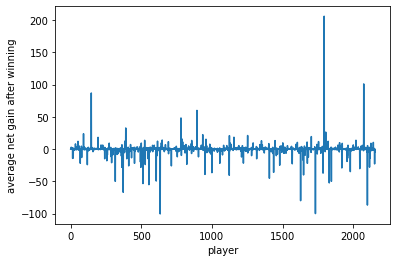

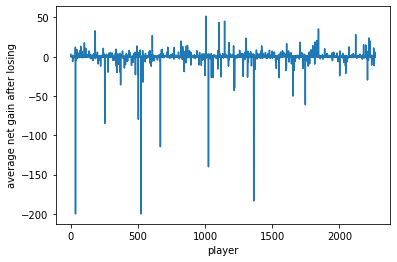

average net gains after winning per player:  -0.12218337315665516
average net gains after losing per player:  -0.21423101993615257


In [7]:

netg_win = []
for i in avg_p_netg_win:
  netg_win.append(i[1])

plt.plot(netg_win)
plt.ylabel('average net gain after winning')
plt.xlabel('player')
plt.show()

netg_lose = []
for i in avg_p_netg_lose:
  netg_lose.append(i[1])

plt.plot(netg_lose)
plt.ylabel('average net gain after losing')
plt.xlabel('player')
plt.show()

#assuming all players are equal level
netg_win = np.array(netg_win)

netg_lose = np.array(netg_lose)

p_avg_after_losing = np.average(netg_win)

p_avg_after_winning = np.average(netg_lose)

print("average net gains after winning per player: ",p_avg_after_winning)
print("average net gains after losing per player: ",p_avg_after_losing)





In [27]:
from statsmodels.stats import weightstats as stests
#testing H0: E(net gain| win previous) - E(net gain | lose previous) = 0


test_statistic, p_val, degrees_of_freedom = stests.ttest_ind(usevar='unequal' ,x1=netg_win, x2=netg_lose)
print("p val is",p_val)
#so reject null
#There is a difference between E(net gain| win previous) - E(net gain | lose previous)

p val is 0.7384991689167599


In [83]:
net_gains_after_winning = np.array(net_gains_after_winning)

net_gains_after_losing = np.array(net_gains_after_losing)

avg_after_losing = np.average(net_gains_after_losing)

avg_after_winning = np.average(net_gains_after_winning)
print("average net gains after winning: ",avg_after_winning)
print("average net gains after losing: ",avg_after_losing)

average net gains after winning:  -0.04702593472653791
average net gains after losing:  -0.04402217612591419
